# **Regression**

## Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

**Which variables are significant in predicting the price of a car.**

* Identify the key factors that influence car
pricing, such as engine size, mileage, brand, etc.

**How well those variables describe the price of a car.**

* Determine the strength and relevance of these factors in accurately predicting the car's price.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

##Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to

## 1.Understand Problem Statement


1. **Clarify the business goal: Predict car prices using independent variables and understand which factors significantly impact the price.The target variable (also known as the dependent variable or response variable) is the variable that you want to predict.Here it is the price**
2. **Emphasize the importance of understanding the pricing dynamics to aid the company's strategic decisions in a new market.**




##2.Import Libraries and Data

In [2]:
# Import common libraries: pandas, numpy, matplotlib, seaborn, sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset

from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [5]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## 3. Check the Data

In [6]:
# To check data types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Statistics Summary
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Checking for missing values
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [9]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [10]:
# Unique Values
df.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


# 4. Data Preprocessing

In [13]:
# Dropping unnecessary columns
df.drop(["car_ID"],axis=1,inplace=True)

In [15]:
#Extracting company name from car name
df['company']=df['CarName'].apply(lambda x:x.split(' ')[0])
df.drop('CarName',axis=1,inplace=True)

In [16]:
unique_companies = df['company'].unique()
print(unique_companies)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [17]:
corrections = {
     'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'toyouta': 'toyota',
    'porcshce': 'porsche',
    'maxda':'mazda',
    'nissan':'Nissan'
    }
df['company'] = df['company'].replace(corrections)
companies = df['company'].unique()
companies

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

**Label Encoding**

In [20]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

**Outliers detection and removal**

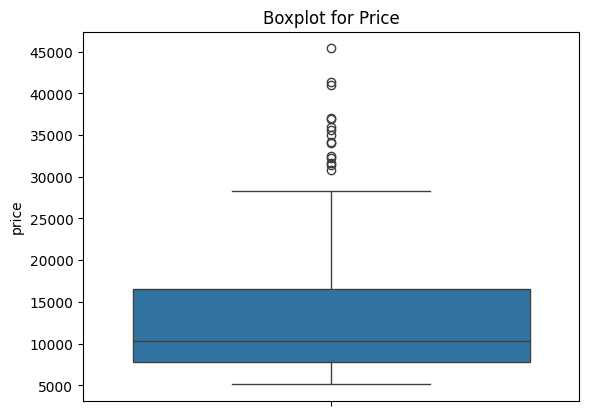

In [21]:
sns.boxplot(df['price'])
plt.title("Boxplot for Price")
plt.show()

**Detecting outliers using IQR**

In [22]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

**Filter out outliers**

In [25]:
df1 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Data after removing outliers:")
print(df1)

Data after removing outliers:
     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         1           0           1        0           2   
1            3         1           0           1        0           2   
2            1         1           0           1        2           2   
3            2         1           0           0        3           1   
4            2         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200         -1         1           0           0        3           2   
201         -1         1           1           0        3           2   
202         -1         1           0           0        3           2   
203         -1         0           1           0        3           2   
204         -1         1           1           0        3           2   

     enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  \
0                 0  

## 5.Feature Selection

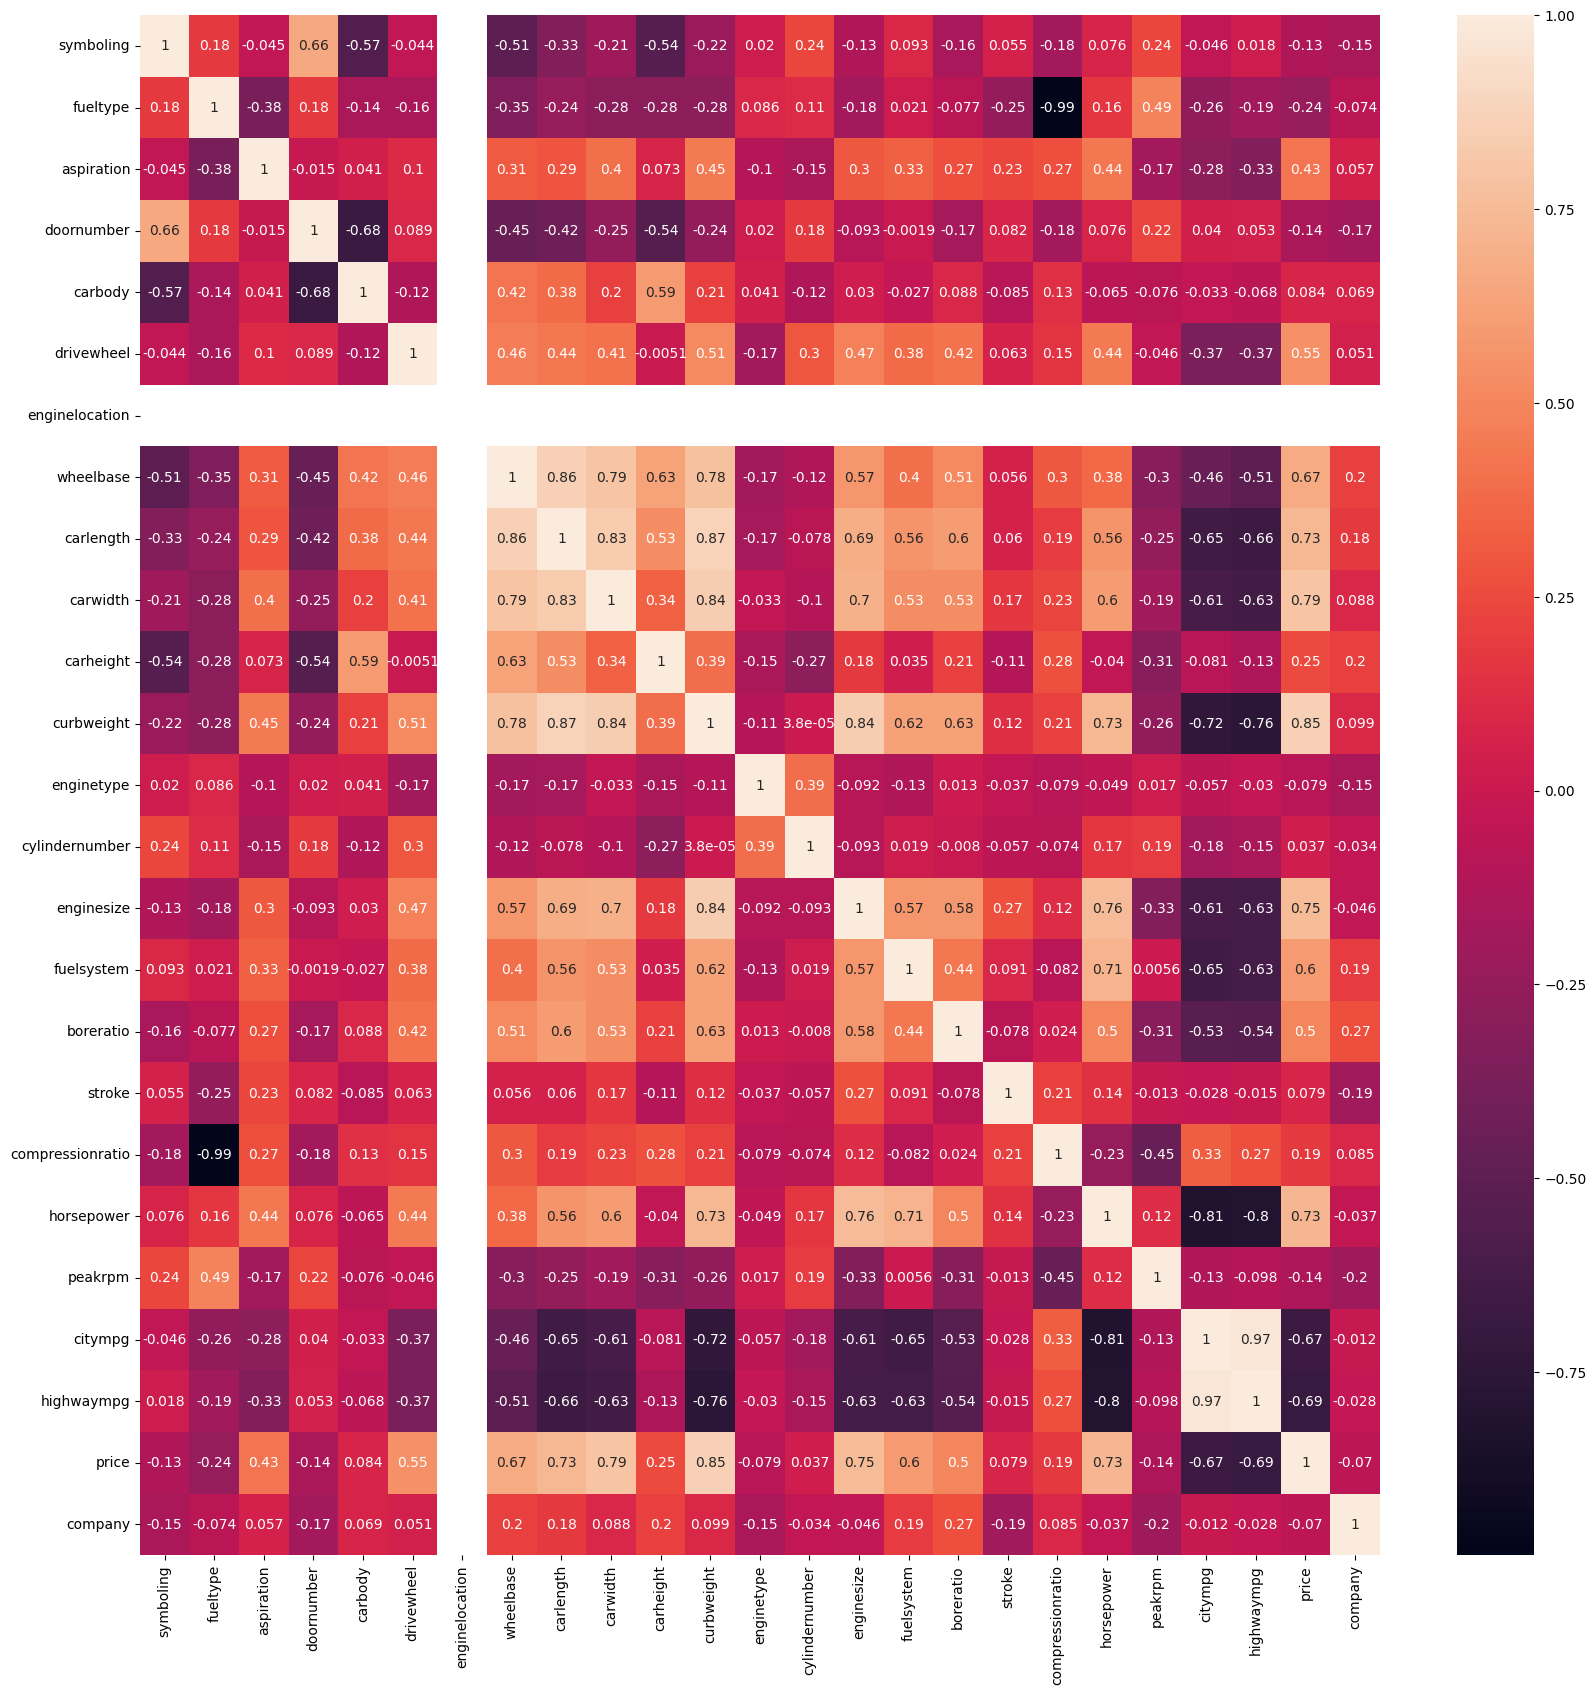

In [28]:
# Generate a correlation matrix to identify relationships between variables.
correlation_matrix = df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

**Remove Multicollinearity**

In [29]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
threshold = 0.85
target_variable = 'price'
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):

        if correlation_matrix.iloc[i, j] > threshold:
            if correlation_matrix.columns[i] != target_variable:
                to_drop.add(correlation_matrix.columns[i])
            if correlation_matrix.columns[j] != target_variable:
                to_drop.add(correlation_matrix.columns[j])
new_df = df1.drop(columns=[col for col in to_drop if col != target_variable])
print("Columns removed due to multicollinearity (excluding target variable):")
print([col for col in to_drop if col != target_variable])
print("Remaining columns:")
print(new_df.columns)

Columns removed due to multicollinearity (excluding target variable):
['highwaympg', 'curbweight', 'carlength', 'citympg', 'wheelbase']
Remaining columns:
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carwidth', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'company'],
      dtype='object')


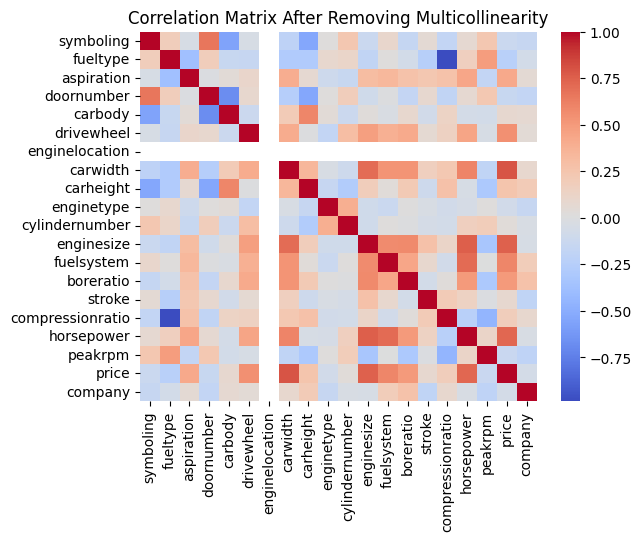

In [30]:
correlation_matrix_reduced = new_df.corr()
sns.heatmap(correlation_matrix_reduced,  cmap='coolwarm')
plt.title('Correlation Matrix After Removing Multicollinearity')
plt.show()

**6. Data Splitting**

In [31]:
X = new_df.drop(columns='price')
y =new_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)

Training set features shape: (152, 19)
Testing set features shape: (38, 19)
Training set target shape: (152,)
Testing set target shape: (38,)


## **7. Model Selection and Implementation**

 **1. Linear Regression:**

 Linear Regression is a statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.The model attempts to find the best-fit line through the data points such that the sum of the squared differences between the observed and predicted values is minimized.

In [32]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [34]:
# Model Evaluation
LR.score(X_test,y_test)

0.807489635311879

In [35]:
predict_LR = LR.predict(X_test)
predict_LR

array([ 6579.60930938, 15497.3980396 ,  6297.74016052,  6738.4668781 ,
       18829.28314628,  3510.37430011, 14971.40392842,  7460.70864105,
        6844.42355254,  7149.17033434,  6463.37267818, 20095.19033839,
        6774.82092439, 18183.23967807,  8694.64669485, 13106.09916326,
       15869.28824563,  6738.4668781 , 10877.97284738,  7238.57767286,
        7003.37333856,  8796.38607834, 13001.98194761, 18829.28314628,
        8857.99457772,  9594.95406886,  7343.19261979,  6767.61281319,
        7368.87571518,  8495.19621934,  8762.25854162,  6738.4668781 ,
       12357.04535585, 10123.35236524,  9579.99422212, 18183.23967807,
        7960.7209124 ,  8999.56049146])

In [36]:
import math
rmse_LR=math.sqrt(mean_squared_error(predict_LR,y_test))
mse_LR = mean_squared_error(y_test,predict_LR)
r2_LR = r2_score(y_test, predict_LR)
print("Linear Regression - MSE:",mse_LR)
print("Linear Regression - RMSE:",rmse_LR)
print("Linear Regression - R2 Score",r2_LR)

Linear Regression - MSE: 3236009.820030027
Linear Regression - RMSE: 1798.8912752109359
Linear Regression - R2 Score 0.807489635311879


**Root mean square error** indicates that, on average, the model’s predictions are off by about 1798.89 units from the actual values. This value represents the average of the squared differences between actual and predicted values. It's harder to interpret because it’s in squared units

R² ranges from 0 to 1, 0**: The model does not explain any of the variance in the target variable., 1: The model perfectly explains all the variance in the target variable.** A value close to 1, such as 0.8075, indicates that the model has a good fit and explains a substantial portion of the variance. The interpretation depends on the scale of your target variable. These metrics suggest the model has a certain level of error, which could be acceptable or might need improvement based on your specific application.

**2.Decision Tree Regressor:**

Decision Tree Regressor is a non-linear model that splits the data into subsets based on feature values. It creates a tree-like model of decisions and their possible consequences. It recursively divides the data into smaller segments based on feature thresholds, aiming to minimize the variance within each segment.

In [37]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
predict_DT = DT.predict(X_test)

**Model Evaluation**

In [39]:
mse_DT = mean_squared_error(y_test, predict_DT)
rmse_DT=math.sqrt(mean_squared_error(predict_DT,y_test))
r2_DT = r2_score(y_test, predict_DT)
print("Decision Tree Regression-Mean Squared Error:",mse_DT)
print("Decison Tree Regression - Root Mean Square Error:",rmse_DT)
print("Decision Tree Regression - R2 Score",r2_DT)

Decision Tree Regression-Mean Squared Error: 2843086.6074707634
Decison Tree Regression - Root Mean Square Error: 1686.1454882277399
Decision Tree Regression - R2 Score 0.8308646542861756


The Decision Tree Regressor has a reasonably good R² score, indicating that it explains a substantial portion of the variance in the target variable. However, the MSE and RMSE are relatively high, suggesting that there may be significant prediction errors. This might be due to overfitting, especially if the tree is too complex and captures noise in the training data. Consider pruning the decision tree or exploring other models to see if you can reduce the error metrics while maintaining or improving the R² score.

**3.Random Forest Regressor:**

Random Forest Regressor is an ensemble learning method that combines multiple decision trees to improve predictive performance and control overfitting. It aggregates the predictions of several decision trees, each trained on different subsets of the data and features, to produce a final prediction.

In [40]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_test)

**Model Evaluation**

In [41]:
mse_RF = mean_squared_error(y_test, predict_RF)
rmse_RF=math.sqrt(mean_squared_error(predict_RF,y_test))
r2_RF = r2_score(y_test, predict_RF)
print("Random Forest Regressor - Mean Squared Error:", mse_RF)
print("Random Forest Regressor - Root Mean Square Error",rmse_RF)
print("Random Forest Regressor - R^2 Score:", r2_RF)

Random Forest Regressor - Mean Squared Error: 1908723.9604854877
Random Forest Regressor - Root Mean Square Error 1381.5657640827264
Random Forest Regressor - R^2 Score: 0.8864499287215988


The Random Forest Regressor performs better than the Decision Tree Regressor in terms of both error metrics (MSE and RMSE) and the R² score. This suggests that the Random Forest model is more robust and better at capturing the underlying patterns in the data. The improvement in performance metrics could be attributed to the Random Forest's ensemble approach, which reduces overfitting and improves generalization compared to a single decision tree.

**4.Gradient Boosting Regressor:**

Gradient Boosting Regressor is another ensemble technique that builds a model in a stage-wise fashion, where each stage corrects the errors of the previous one.It trains models sequentially, with each new model focusing on the residual errors of the combined ensemble of previous models. The predictions are aggregated to make the final prediction.

In [42]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
predict_GBR = GBR.predict(X_test)


**Model Evaluation**

In [43]:
mse_GBR = mean_squared_error(y_test,predict_GBR)
rmse_GBR=math.sqrt(mean_squared_error(predict_GBR,y_test))
r2_GBR = r2_score(y_test,predict_GBR)
print("Gradient Boosting Regressor - Mean Squared Error:", mse_GBR)
print("Gradient Boosting Regressor-Root Mean Square Value;",rmse_GBR)
print("Gradient Boosting Regressor - R^2 Score:", r2_GBR)

Gradient Boosting Regressor - Mean Squared Error: 2069098.5498729227
Gradient Boosting Regressor-Root Mean Square Value; 1438.4361473047466
Gradient Boosting Regressor - R^2 Score: 0.8769092374361205


The Gradient Boosting Regressor performs comparably to the Random Forest Regressor, with a slight decrease in MSE, RMSE, and R² score. The performance of both models is quite strong, but the Random Forest Regressor has a slight edge in terms of accuracy and explaining variance. Gradient Boosting methods are known for their robustness and ability to model complex patterns, but in this case, the Random Forest appears to have a marginally better performance based on the provided metrics.

**4.Support Vector Regressor:**

Support Vector Regressor is a type of support vector machine used for regression tasks. It aims to fit the data within a predefined margin of tolerance while minimizing the prediction errors.It uses support vectors (data points that are close to the decision boundary) to define the regression function. The goal is to find a function that deviates from the actual observed values by at most a specified margin.

In [44]:
svr = SVR()
svr.fit(X_train, y_train)
predict_svr = svr.predict(X_test)

**Model evaluation**

In [45]:
mse_svr = mean_squared_error(y_test, predict_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test,predict_svr)
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R² Score: {r2_svr}")

Mean Squared Error (MSE): 17228185.891430188
Root Mean Squared Error (RMSE): 4150.684990628678
R² Score: -0.024905526659740218


## 8.Evaluation of models

1.**Random Forest Regressor**: Best performance with the lowest MSE (1,960,059.2142), lowest RMSE (1,400.021), and highest R² score (0.8834). This indicates that the model is capturing most of the variability in car prices and providing accurate predictions.

2.**Gradient Boosting Regressor**: Close second with slightly higher error metrics than Random Forest, but still a strong model for predicting car prices.

3.**Linear Regression**: Performed reasonably well but was outperformed by the ensemble methods. MSE (3,236,009.8200) and R² score (0.8075) indicate that while it captures some of the variability, it’s not as robust as the ensemble methods.

4.**Decision Tree Regressor**: This model did not perform as well as the Random Forest or Gradient Boosting Regressors. Its MSE and RMSE are higher, and the R² score is lower, indicating that it is less accurate in predicting car prices.MSE: 4,485,063.9399,RMSE: 2,117.797,R² Score: 0.7332

5.**Support Vector Regressor** (SVR): Worst performance with extremely high error metrics and a negative R² score, indicating that the model fails to capture the relationship between features and car prices effectively.


##**Analysis**

   **Best-Performing Model**: The Random Forest Regressor remains the best-performing model, with the lowest error metrics and the highest R² score. It captures the relationships in the data more effectively than the other models.

## **Conclusion**

  The results indicate that ensemble methods, particularly the Random Forest Regressor, provide the most reliable predictions for car prices in this context. These insights can be leveraged by the Chinese automobile company to fine-tune their car designs and pricing strategies for successful entry into the U.S. market.